<a href="https://colab.research.google.com/github/GePajarinen/Studying-Spark/blob/main/Microproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The plan is to use SQL and also the df options for the same result:   

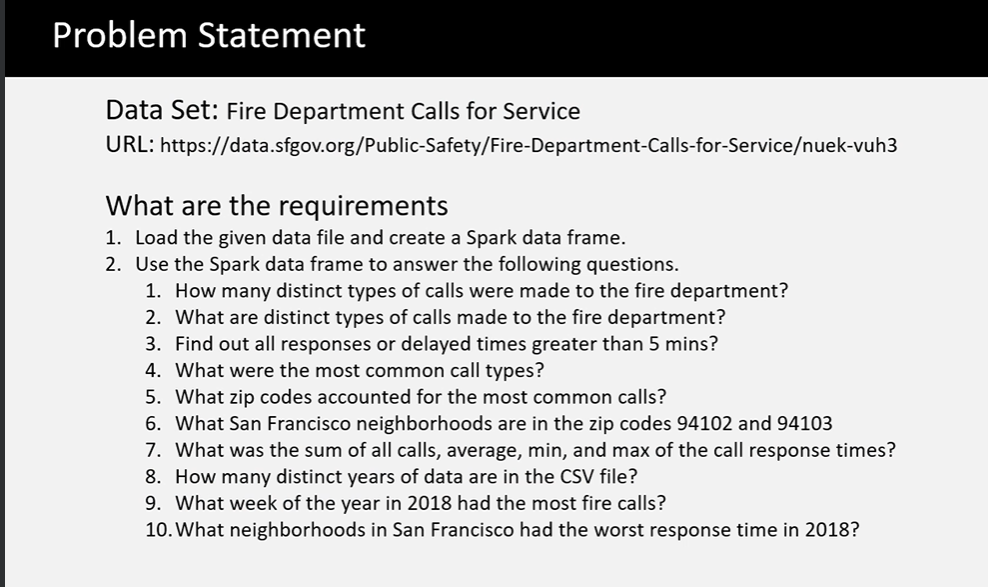


https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3/about_data

In [ ]:
!pip install --upgrade pip
!pip install pyspark

from pyspark.sql import *
from pyspark import SparkFiles
#from pyspark import SparkContext as sc
from pyspark import SparkConf
from pyspark.context import SparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a8afa547df589730d551ddd4163053d39dd4104dfe25bd08742ddf145c8353b3
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


## 1. Load the given data file and create a Spark data frame:
Data info: https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3/about_data

Download: https://data.sfgov.org/resource/nuek-vuh3.csv

In [ ]:
spark = SparkSession.builder \
        .appName("Spark 1") \
        .master("local[2]") \
        .getOrCreate()

sc = SparkContext.getOrCreate(SparkConf())

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Microproject/nuek-vuh3.csv"

sc.addFile(path)
df = spark.read.csv(path, header=True, inferSchema= True)
df.show(10)

+-----------+-------+---------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+----------------------+-------------------+--------------------+----+-------------------+---------+------------+----+-----------------+--------+--------------+--------+---------------+----------------+------------+------------------------------+------------------------+-------------------+---------------------------------+-------------+--------------------+-------------------+-------------------+---------------------------+
|call_number|unit_id|incident_number|           call_type|          call_date|         watch_date|      received_dttm|         entry_dttm|      dispatch_dttm|      response_dttm|      on_scene_dttm|     transport_dttm|      hospital_dttm|call_final_disposition|     available_dttm|             address|city|zipcode_of_incident|battali


Trying to use the link form my github:

In [ ]:
"""
data_file_https_url = "https://github.com/GePajarinen/Studying-Spark/blob/main/data_scr/nuek-vuh3.csv"
sc.addFile(data_file_https_url)
filePath  = 'file://' +SparkFiles.get('nuek-vuh3.csv')

print(SparkFiles.get('nuek-vuh3.csv'))

tmpPath = SparkFiles.get('nuek-vuh3.csv')
#df2 = spark.read.csv(filePath, header=True, inferSchema= True)
df2 = spark.read.csv(tmpPath, header=True, inferSchema= True)
df2.show()
"""

'\ndata_file_https_url = "https://github.com/GePajarinen/Studying-Spark/blob/main/data_scr/nuek-vuh3.csv"\nsc.addFile(data_file_https_url)\nfilePath  = \'file://\' +SparkFiles.get(\'nuek-vuh3.csv\')\n\nprint(SparkFiles.get(\'nuek-vuh3.csv\'))\n\ntmpPath = SparkFiles.get(\'nuek-vuh3.csv\')\n#df2 = spark.read.csv(filePath, header=True, inferSchema= True)\ndf2 = spark.read.csv(tmpPath, header=True, inferSchema= True)\ndf2.show()\n'


## 2. Use the Spark data frame to answer the following questions:



### 1. How many distinct types of calls were made to the fire department?

In [ ]:
df.printSchema()

root
 |-- call_number: integer (nullable = true)
 |-- unit_id: string (nullable = true)
 |-- incident_number: integer (nullable = true)
 |-- call_type: string (nullable = true)
 |-- call_date: timestamp (nullable = true)
 |-- watch_date: timestamp (nullable = true)
 |-- received_dttm: timestamp (nullable = true)
 |-- entry_dttm: timestamp (nullable = true)
 |-- dispatch_dttm: timestamp (nullable = true)
 |-- response_dttm: timestamp (nullable = true)
 |-- on_scene_dttm: timestamp (nullable = true)
 |-- transport_dttm: timestamp (nullable = true)
 |-- hospital_dttm: timestamp (nullable = true)
 |-- call_final_disposition: string (nullable = true)
 |-- available_dttm: timestamp (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zipcode_of_incident: integer (nullable = true)
 |-- battalion: string (nullable = true)
 |-- station_area: integer (nullable = true)
 |-- box: integer (nullable = true)
 |-- original_priority: string (nullable = true)

Temporary views in Spark SQL are session-scoped and will disappear if the session that creates it terminates. If you want to have a temporary view that is shared among all sessions and keep alive until the Spark application terminates, you can create a global temporary view. Global temporary view is tied to a system preserved database global_temp, and we must use the qualified name to refer it, e.g. SELECT * FROM global_temp.view1.

In [ ]:
df.createOrReplaceGlobalTempView("fire_department")
# with createGlobalTempView() -> Can not run more than once, cause AnalysisException: [TEMP_TABLE_OR_VIEW_ALREADY_EXISTS]
# Cannot create the temporary view `fire_department` because it already exists.
# Choose a different name, drop or replace the existing view,  or add the IF NOT EXISTS clause to tolerate pre-existing views.

In [53]:
df_call_types = spark.sql("SELECT DISTINCT call_type FROM global_temp.fire_department")

In [54]:
df_call_types.count()

18

OR

In [ ]:
spark.sql("SELECT COUNT(DISTINCT call_type) FROM global_temp.fire_department").show()

+-------------------------+
|count(DISTINCT call_type)|
+-------------------------+
|                       18|
+-------------------------+





---

### 2. What are  distinct types of calls made to the fire department?


In [ ]:
df_call_types.collect()

[Row(call_type='Elevator / Escalator Rescue'),
 Row(call_type='Structure Fire / Smoke in Building'),
 Row(call_type='Administrative'),
 Row(call_type='Alarms'),
 Row(call_type='Odor (Strange / Unknown)'),
 Row(call_type='Citizen Assist / Service Call'),
 Row(call_type='Explosion'),
 Row(call_type='Vehicle Fire'),
 Row(call_type='Other'),
 Row(call_type='Outside Fire'),
 Row(call_type='Traffic Collision'),
 Row(call_type='Gas Leak (Natural and LP Gases)'),
 Row(call_type='Water Rescue'),
 Row(call_type='Electrical Hazard'),
 Row(call_type='Industrial Accidents'),
 Row(call_type='Medical Incident'),
 Row(call_type='Smoke Investigation (Outside)'),
 Row(call_type='Train / Rail Incident')]



---

### 3. Find out all responses or delayed times greater than 5 mins.


Considering:   
**Received DtTm**	   
(Date and time of call is received at the 911 Dispatch Center.)   
x   
**Response DtTm**    
(Date and time this unit acknowledges the dispatch and records that the unit is en route to the location of the call.)   

In [ ]:
spark.sql("SELECT received_dttm, response_dttm FROM global_temp.fire_department").show()

+-------------------+-------------------+
|      received_dttm|      response_dttm|
+-------------------+-------------------+
|2006-11-20 16:07:27|2006-11-20 16:10:25|
|2006-11-23 01:50:47|2006-11-23 01:55:31|
|2006-11-21 09:27:25|2006-11-21 09:31:23|
|2006-11-15 16:10:59|2006-11-15 16:12:59|
|2006-11-17 19:47:34|2006-11-17 19:51:24|
|2006-11-16 10:26:47|2006-11-16 10:29:38|
|2006-11-21 19:38:51|2006-11-21 19:46:25|
|2006-11-24 10:34:41|2006-11-24 10:41:56|
|2006-11-22 18:54:35|               NULL|
|2006-11-23 15:44:42|2006-11-23 15:47:58|
|2006-11-08 14:11:31|               NULL|
|2006-11-09 17:54:59|2006-11-09 17:57:12|
|2006-11-15 13:06:04|2006-11-15 13:12:26|
|2006-11-23 19:54:41|2006-11-23 19:58:08|
|2006-11-24 18:22:06|2006-11-24 18:24:58|
|2006-11-19 11:05:44|2006-11-19 11:09:12|
|2006-11-13 14:50:38|2006-11-13 14:54:06|
|2006-11-08 17:22:57|2006-11-08 17:25:31|
|2006-11-18 09:02:23|2006-11-18 09:04:28|
|2006-11-21 09:27:25|2006-11-21 09:32:13|
+-------------------+-------------

In [ ]:
spark.sql("SELECT incident_number, call_type, DATEDIFF(minute, received_dttm, response_dttm) AS Time_Response FROM global_temp.fire_department WHERE  DATEDIFF(minute, received_dttm, response_dttm) > 5").show()

+---------------+--------------------+-------------+
|incident_number|           call_type|Time_Response|
+---------------+--------------------+-------------+
|        6091862|    Medical Incident|            7|
|        6092518|    Medical Incident|            7|
|        6090094|    Medical Incident|            6|
|        6088226|    Medical Incident|            6|
|        6090955|    Medical Incident|            9|
|        6089761|    Medical Incident|           24|
|        6092154|   Traffic Collision|            8|
|        6089739|    Medical Incident|           12|
|        6091345|    Medical Incident|            8|
|        6091975|    Medical Incident|           23|
|        6092032|    Medical Incident|            6|
|        6090112|    Medical Incident|           19|
|        6089597|Citizen Assist / ...|            6|
|        6089163|    Medical Incident|            6|
|        6090606|    Medical Incident|            6|
|        6091583|    Medical Incident|        

In [ ]:
#Just testing EXTRACT:
#spark.sql("SELECT EXTRACT(HOUR FROM received_dttm) FROM global_temp.fire_department").show(5)

### 4. What are the most common call types?


In [45]:
spark.sql("SELECT DISTINCT call_type, COUNT(call_type) AS Total FROM global_temp.fire_department GROUP BY call_type ORDER BY Total DESC").show(10)

+--------------------+-----+
|           call_type|Total|
+--------------------+-----+
|    Medical Incident|  600|
|Structure Fire / ...|  147|
|              Alarms|  112|
|   Traffic Collision|   72|
|Citizen Assist / ...|   18|
|               Other|   13|
|        Vehicle Fire|    8|
|Odor (Strange / U...|    7|
|Gas Leak (Natural...|    6|
|        Outside Fire|    4|
+--------------------+-----+
only showing top 10 rows



## 5. What zip codes accounted for the common calls?


In [52]:
spark.sql("SELECT DISTINCT call_type, COUNT(call_type) AS Total, zipcode_of_incident FROM global_temp.fire_department GROUP BY call_type, zipcode_of_incident ORDER BY Total DESC, call_type ").show(30)

+--------------------+-----+-------------------+
|           call_type|Total|zipcode_of_incident|
+--------------------+-----+-------------------+
|    Medical Incident|   80|              94102|
|    Medical Incident|   68|              94103|
|    Medical Incident|   62|              94110|
|    Medical Incident|   56|              94109|
|    Medical Incident|   33|              94112|
|    Medical Incident|   33|              94124|
|    Medical Incident|   29|              94133|
|    Medical Incident|   23|              94107|
|    Medical Incident|   23|              94115|
|    Medical Incident|   20|              94122|
|Structure Fire / ...|   20|              94110|
|Structure Fire / ...|   20|              94103|
|    Medical Incident|   18|              94134|
|    Medical Incident|   17|              94132|
|    Medical Incident|   17|              94121|
|              Alarms|   16|              94109|
|    Medical Incident|   15|              94114|
|    Medical Inciden

## 6. What San Francisco neighborhood are in the zip codes 94102 and 94103?


In [64]:
spark.sql("SELECT DISTINCT neighborhoods_analysis_boundaries AS Neighborhood, zipcode_of_incident AS Zip_code FROM global_temp.fire_department WHERE zipcode_of_incident IN (94102, 94103)").show(30)

+--------------------+--------+
|        Neighborhood|Zip_code|
+--------------------+--------+
|    Western Addition|   94102|
|          Tenderloin|   94102|
|            Nob Hill|   94102|
|     South of Market|   94103|
|        Hayes Valley|   94103|
|Financial Distric...|   94102|
|         Mission Bay|   94103|
|          Tenderloin|   94103|
|Financial Distric...|   94103|
|        Hayes Valley|   94102|
|             Mission|   94103|
+--------------------+--------+



### 7. What was the sum of all calls, average, min, and max of the call response times?


In [66]:
## SUM OF ALL CALLS:
spark.sql("SELECT COUNT(call_number) AS Sum_calls FROM global_temp.fire_department").show()

+---------+
|Sum_calls|
+---------+
|     1000|
+---------+



In [80]:
# average, min, and max of the call response times:
spark.sql("SELECT MIN(DATEDIFF(second, received_dttm, response_dttm)) AS MIN_time_response_sec, MAX(DATEDIFF(minute, received_dttm, response_dttm)) AS MAX_time_response_min, ROUND(AVG(DATEDIFF(minute, received_dttm, response_dttm)), 2) AS AVG_time_response_min FROM global_temp.fire_department").show()

+---------------------+---------------------+---------------------+
|MIN_time_response_sec|MAX_time_response_min|AVG_time_response_min|
+---------------------+---------------------+---------------------+
|                   19|                   58|                 3.34|
+---------------------+---------------------+---------------------+



8. How many distinct years of data are in the CSV file?


9. What week of the year in 2018 had the most fire calls?


10. What neighborhoods in San Francisco had the worst response time in 2018?